## 输出字体图片

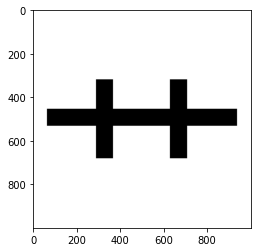

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from fontTools.ttLib import TTFont

from os import listdir
from os.path import isfile, join

sans_path = '../source-han-sans/Regular/'
sans_files = ['SourceHanSansCN-Regular.otf',
              'SourceHanSansTW-Regular.otf',
              'SourceHanSansHK-Regular.otf',
              'SourceHanSansJP-Regular.otf',
              'SourceHanSansKR-Regular.otf']
fontfiles = [join(sans_path, f) for f in sans_files]

# print(fontfiles)

def takeUnicode(elem):
    return elem.encode('unicode_escape').decode()

def has_glyph(glyph, fontpath):
    font = TTFont(fontpath)
    for table in font['cmap'].tables:
        if ord(glyph) in table.cmap.keys():
            return True
    return False

def getImage(text,size,fontpath):
    font = ImageFont.truetype(fontpath,size)
    #font = ImageFont.truetype(fontpath,size, layout_engine=ImageFont.LAYOUT_BASIC)
    #print(dir(font))
    #from pprint import pprint
    #pprint(vars(font))
    # ----------- text 2 image --------------------
    width, height = font.getsize(text)
    offsetx, offsety = font.getoffset(text)
    xmin, ymin, xmax, ymax = font.getmask(text).getbbox()
    #print('w, h, before crop... ', width, height)
    #print('offset before crop ', offsetx, offsety)
    #print('bbox corners ',xmin, ymin, xmax, ymax)
    absxmin, absymin, absxmax, absymax = offsetx + xmin, offsety + ymin, offsetx + xmax, offsety + ymax

    canvas = Image.new("RGB",(width,height),(255,255,255))
    draw = ImageDraw.Draw(canvas)
    draw.text((0,0), text, font=font, fill="#000000")
    # draw.rectangle([absxmin, absymin, absxmax, absymax],outline='red',width=5)

    # ------------ crop img --------------
    canvas = canvas.crop((absxmin, absymin, absxmax, absymax))
    width, height = canvas.size
    #print('bbox w, h after crop ', width, height)

    if width>size or height>size:
        scale = max(width, height)/float(size)
        new_w, new_h = int(width/scale), int(height/scale)
        canvas = canvas.resize((new_w, new_h))
        width, height = canvas.size
        print('bbox w, h after resize ', width, height)

    # ------------ pad img ---------------
    pad_left = (size - width)//2
    pad_top = (size - height)//2
    canvas2 = Image.new("RGB",(size,size),(255,255,255))
    canvas2.paste(canvas,(pad_left, pad_top))
    # box = getbox(im)
    # print(box)
    return canvas2

def getbox(img):
    box = None
    arr = np.asarray(img)
    if len(arr.shape) == 3:
        arr = arr[:,:,0]
    arr_arg = np.argwhere(arr<255)
    if len(arr_arg) == 0:
        # print('empty image, text not exist')
        box = None
    else:
        max_yx = np.max(arr_arg,0)
        min_yx = np.min(arr_arg,0)
    #     print(min_yx, max_yx)
        x0,y0,x1,y1 = min_yx[1], min_yx[0], max_yx[1], max_yx[0]
        box = [x0,y0,x1,y1]
    return box

def addbox(img, box):
    dr=ImageDraw.Draw(img)
    dr.rectangle(box, outline='blue', width=5)
    return img

# 单独一个字保存到目录下
# getFontImage_test('罙',size).save('./data/1225/source_{}.png'.format(takeUnicode('罙')[2:]))
# 㚑彐大, 䔝艹紫
text = '艹'
size = 1000
fontpath=fontfiles[0]
# check if text exists in font
check = has_glyph(text, fontpath)
img = getImage(text, size, fontpath)
img.save('./{}.png'.format(takeUnicode(text)[1:]))
# 𪠇
# 罙
# 亻

# 单独预览一个字
plt.imshow(img)
# plt.imshow(getFontImage_test("𪠇",size,fontpaths=None,complement_fontpaths=None)) #\U000F0003 \ue050 fontpaths=fontfiles
plt.axis('on') # 关掉坐标轴为 off
plt.show()


w, h, before crop...  1000 1160
offset before crop  0 370
bbox corners  63 0 935 363
bbox w, h after crop  872 363


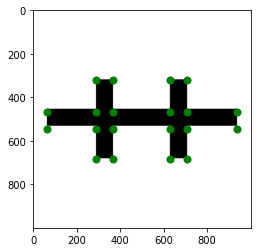

In [15]:
text = '艹'
size = 1000
fontpath=fontfiles[0]
# check if text exists in font
check = has_glyph(text, fontpath)
#---------------------------------------------------------------
font = ImageFont.truetype(fontpath,size)
# ----------- text 2 image --------------------
width, height = font.getsize(text)
offsetx, offsety = font.getoffset(text)
xmin, ymin, xmax, ymax = font.getmask(text).getbbox()
print('w, h, before crop... ', width, height)
print('offset before crop ', offsetx, offsety)
print('bbox corners ',xmin, ymin, xmax, ymax)
absxmin, absymin, absxmax, absymax = offsetx + xmin, offsety + ymin, offsetx + xmax, offsety + ymax

canvas = Image.new("RGB",(width,height),(255,255,255))
draw = ImageDraw.Draw(canvas)
draw.text((0,0), text, font=font, fill="#000000")
# draw.rectangle([absxmin, absymin, absxmax, absymax],outline='red',width=5)
# ------------ crop img --------------
canvas = canvas.crop((absxmin, absymin, absxmax, absymax))
width, height = canvas.size
print('bbox w, h after crop ', width, height)
# ------------ pad img ---------------
pad_left = (size - width)//2
pad_top = (size - height)//2
canvas2 = Image.new("RGB",(size,size),(255,255,255))
canvas2.paste(canvas,(pad_left, pad_top))
img = canvas2
#---------------------------------------------------------------
nodelist = [288,790,
288,655,
63,655 ,
63,577 ,
288,577 ,
288,428 ,
366,428 ,
366,577 ,
627,577 ,
627,428 ,
706,428 ,
706,577 ,
935,577 ,
935,655 ,
706,655 ,
706,790 ,
627,790 ,
627,655 ,
366,655 ,
366,790]

mysize = int(len(nodelist)/2),2
node_array = np.array(nodelist)
node_array = node_array.reshape(mysize)
x,y=node_array[:,0],node_array[:,1]

boxGlyph_Origin = [63, 428]
x = x - boxGlyph_Origin[0]
y = y - boxGlyph_Origin[1]

boxGlyph_Size = [872, 362]
width = boxGlyph_Size[0]
height = boxGlyph_Size[1]
pad_left = (size - width)//2
pad_top = (size - height)//2

x = x + pad_left
y = y + pad_top

plt.scatter(x, y, c="g", s=50, marker=r'o')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.show()


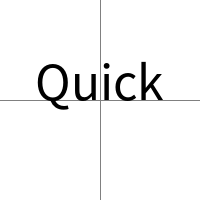

In [21]:
from PIL import Image, ImageDraw, ImageFont
font = ImageFont.truetype(fontpath, 48)
im = Image.new("RGB", (200, 200), "white")
d = ImageDraw.Draw(im)
d.line(((0, 100), (200, 100)), "gray")
d.line(((100, 0), (100, 200)), "gray")
d.text((100, 100), "Quick", fill="black", anchor="ms", font=font)
im